### 연속 확률분포란?
* 이산 vs 연속:
  * 이산: 동전 던지기, 주사위 -> PMF (확률질량함수)
  * 연속: 키, 몸무게, 온도 -> PDF(확률밀도함수)

### 균등분포
* 모든 값이 동일한 확률로 나타날 때
* 예: 난수 생성, 시뮬레이션
* 매개변수: a (최솟값), b (최댓값)
* PDF: $f(x) = 1/(b-a) (a ≤ x ≤ b)$

### 정규분포
* 가장 중요한 분포. 자연계와 사회현상의 대부분
* 예: 키, 시험 점수, 측정 오차
* 특징: 종 모양, 평균 중심 대칭
* 파라미터: μ(평균), σ²(분산)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import matplotlib as mpl

# 한글 폰트 설정 (선택사항)
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

=== 균등분포 ===
3과 7 사이 확률: 0.4000


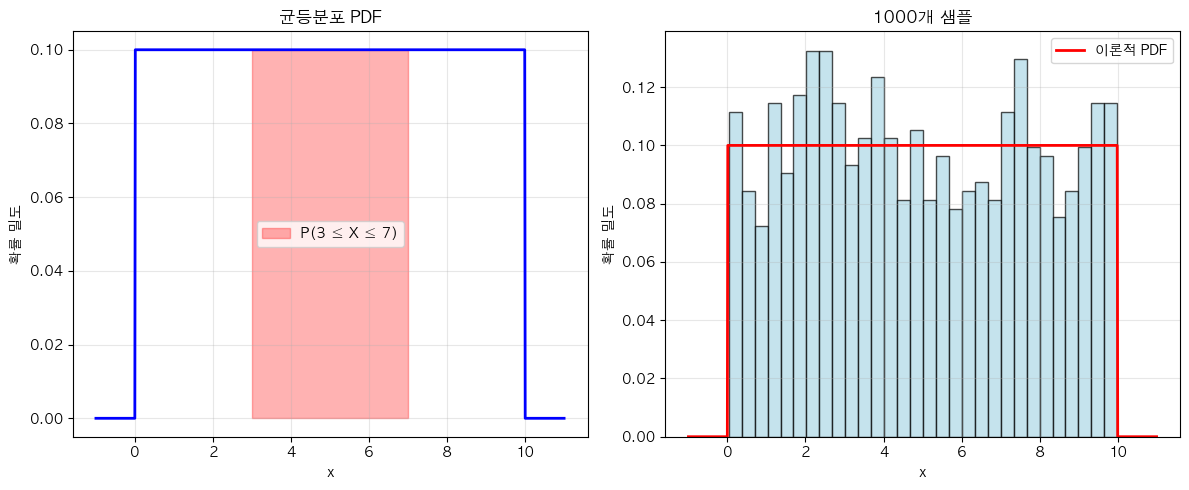

In [2]:
# 1. 균등분포
print("=== 균등분포 ===")
# 0~10 사이 균등분포
a, b = 0, 10
uniform_dist = stats.uniform(a, b-a)

# 확률 계산 (3~7 사이)
prob = uniform_dist.cdf(7) - uniform_dist.cdf(3)
print(f"3과 7 사이 확률: {prob:.4f}")

# 시각화
x = np.linspace(-1, 11, 1000)
pdf = uniform_dist.pdf(x)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, pdf, linewidth=2, color='blue')
plt.fill_between(x, pdf, where=(x>=3) & (x<=7), alpha=0.3, color='red', label='P(3 ≤ X ≤ 7)')
plt.xlabel('x')
plt.ylabel('확률 밀도')
plt.title('균등분포 PDF')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
samples = uniform_dist.rvs(size=1000)
plt.hist(samples, bins=30, alpha=0.7, color='lightblue', edgecolor='black', density=True)
plt.plot(x, pdf, 'r-', linewidth=2, label='이론적 PDF')
plt.xlabel('x')
plt.ylabel('확률 밀도')
plt.title('1000개 샘플')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [3]:
# 2. 정규분포 기초
print("\n=== 정규분포 ===")
mu, sigma = 170, 10  # 평균 170cm, 표준편차 10cm
normal_dist = stats.norm(mu, sigma)

# 확률 계산
print(f"키 160cm 이하 비율: {normal_dist.cdf(160):.2%}")
print(f"키 180cm 이상 비율: {1 - normal_dist.cdf(180):.2%}")
print(f"키 165~175cm 비율: {normal_dist.cdf(175) - normal_dist.cdf(165):.2%}")


=== 정규분포 ===
키 160cm 이하 비율: 15.87%
키 180cm 이상 비율: 15.87%
키 165~175cm 비율: 38.29%


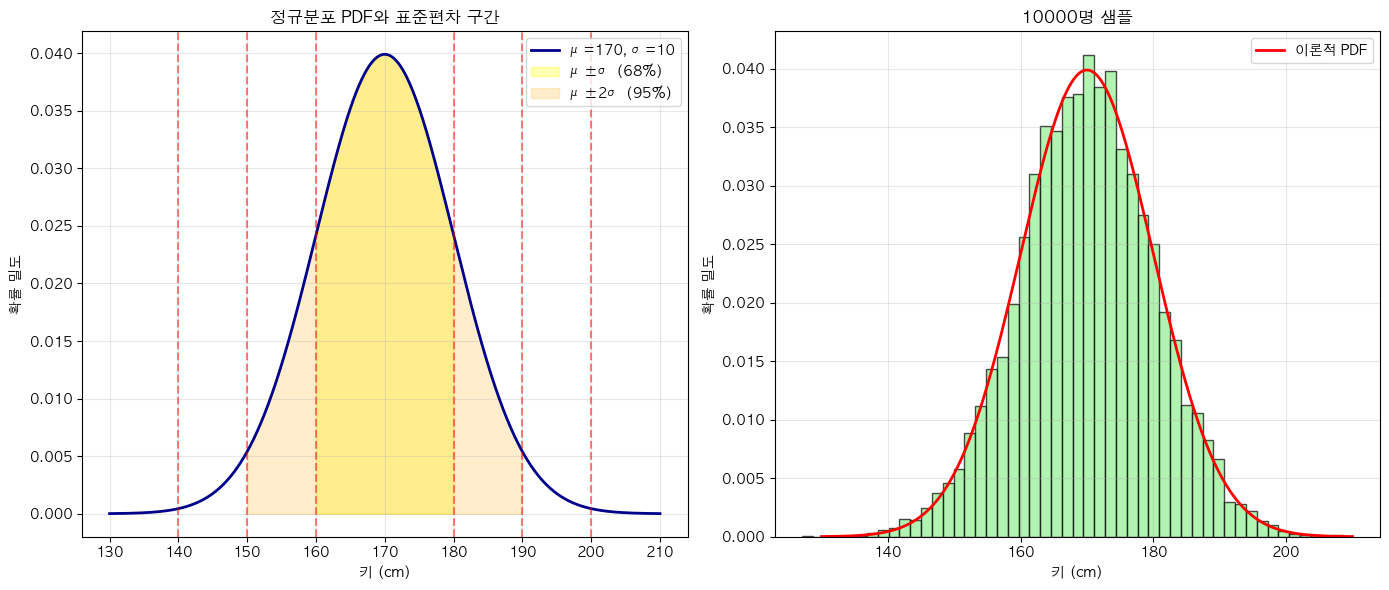

In [4]:
# 3. 정규분포 시각화
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = normal_dist.pdf(x)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, pdf, linewidth=2, color='darkblue', label=f'μ={mu}, σ={sigma}')
# 표준편차 구간 표시
for i in range(1, 4):
    plt.axvline(mu - i*sigma, color='red', linestyle='--', alpha=0.5)
    plt.axvline(mu + i*sigma, color='red', linestyle='--', alpha=0.5)
plt.fill_between(x, pdf, where=(x>=mu-sigma) & (x<=mu+sigma), alpha=0.3, color='yellow', label='μ±σ (68%)')
plt.fill_between(x, pdf, where=(x>=mu-2*sigma) & (x<=mu+2*sigma), alpha=0.2, color='orange', label='μ±2σ (95%)')
plt.xlabel('키 (cm)')
plt.ylabel('확률 밀도')
plt.title('정규분포 PDF와 표준편차 구간')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
samples = normal_dist.rvs(size=10000)
plt.hist(samples, bins=50, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
plt.plot(x, pdf, 'r-', linewidth=2, label='이론적 PDF')
plt.xlabel('키 (cm)')
plt.ylabel('확률 밀도')
plt.title('10000명 샘플')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
# 4. 68-95-99.7 규칙 검증
print("\n=== 68-95-99.7 규칙 검증 ===")
samples = normal_dist.rvs(size=100000)
within_1sigma = np.sum((samples >= mu-sigma) & (samples <= mu+sigma)) / len(samples)
within_2sigma = np.sum((samples >= mu-2*sigma) & (samples <= mu+2*sigma)) / len(samples)
within_3sigma = np.sum((samples >= mu-3*sigma) & (samples <= mu+3*sigma)) / len(samples)

print(f"μ±σ 내 비율: {within_1sigma:.2%} (이론: 68%)")
print(f"μ±2σ 내 비율: {within_2sigma:.2%} (이론: 95%)")
print(f"μ±3σ 내 비율: {within_3sigma:.2%} (이론: 99.7%)")


=== 68-95-99.7 규칙 검증 ===
μ±σ 내 비율: 68.12% (이론: 68%)
μ±2σ 내 비율: 95.39% (이론: 95%)
μ±3σ 내 비율: 99.74% (이론: 99.7%)


In [7]:
# 1. 시험 점수가 평균 75점, 표준편차 12점인 정규분포를 따릅니다. 90점 이상을 받을 확률은?
mean, sigma = 75, 12

normal_dist = stats.norm(mean, sigma)

pdf = (1 - normal_dist.cdf(90))
print(pdf)

0.10564977366685535


In [9]:
# 2. 제품 무게가 균등분포 U(95, 105)를 따릅니다. 무게가 98g 이하이거나 102g 이상일 확률은?
a, b = 95, 105
uniform_dist = stats.uniform(a, b - a)

prob1 = uniform_dist.cdf(98)
prob2 = 1 - uniform_dist.cdf(102)
prob = prob1 + prob2
print(f"98g 이하이거나 102 이상일 확률: {prob:.4f}")

98g 이하이거나 102 이상일 확률: 0.7000


In [10]:
# 3. 정규분포에서 샘플 1000개를 생성하고, 평균과 표준편차를 계산해 원래 파라미터와 비교하세요.

# 정규분포 파라미터
mu = 0        # 평균
sigma = 1     # 표준편차

# 샘플 1000개 생성
samples = np.random.normal(mu, sigma, 1000)

# 샘플 평균과 표준편차 계산
sample_mean = np.mean(samples)
sample_std = np.std(samples, ddof=1)  # 표본표준편차는 ddof=1

print(f"원래 평균(mu): {mu},   샘플 평균: {sample_mean:.4f}")
print(f"원래 표준편차(sigma): {sigma}, 샘플 표준편차: {sample_std:.4f}")

원래 평균(mu): 0,   샘플 평균: 0.0367
원래 표준편차(sigma): 1, 샘플 표준편차: 1.0148
